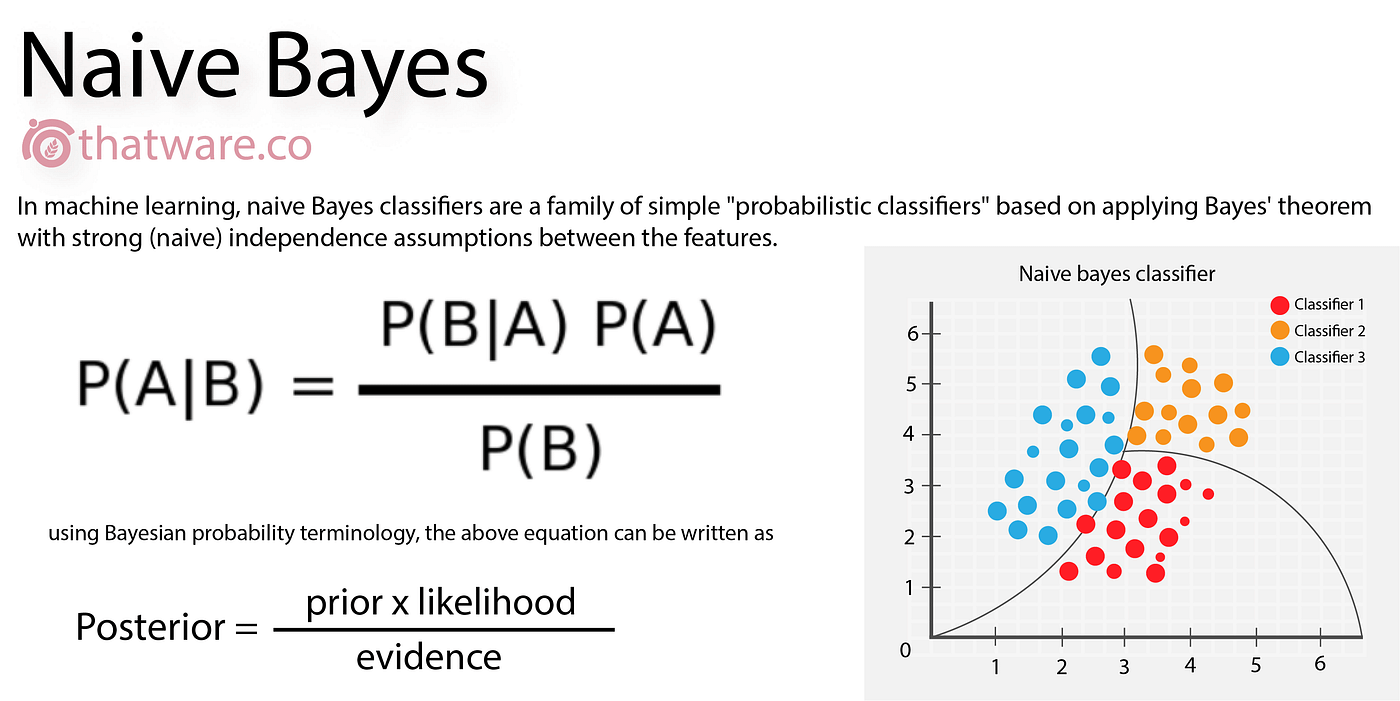

# Introduction
Naive Bayes is a family of probabilistic algorithms based on Bayes' Theorem with the “naive” assumption of independence between every pair of features. It is widely used in text classification problems, such as spam detection, sentiment analysis, etc.

# Mathematical Intuition

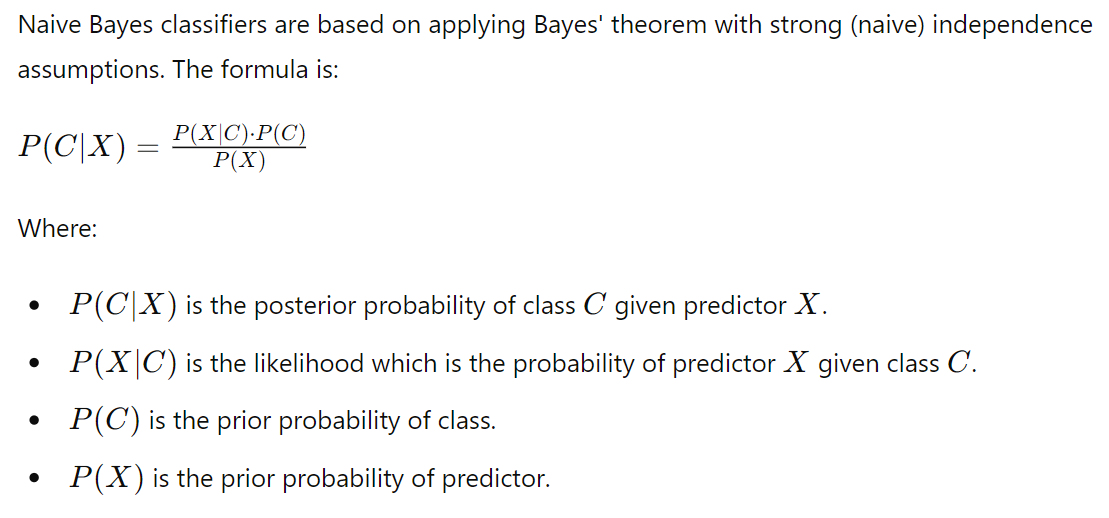

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, \
confusion_matrix, accuracy_score

In [6]:
email = pd.read_csv('spam.csv')
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
email.sample()

,Category,Message
4213,spam,Missed call alert. These numbers called but le...


In [9]:
print(email.loc[2,'Message'])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [10]:
email.loc[2,'Category']

'spam'

In [11]:
email['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
email.iloc[200,1]

'Found it, ENC  &lt;#&gt; , where you at?'

In [12]:
email['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

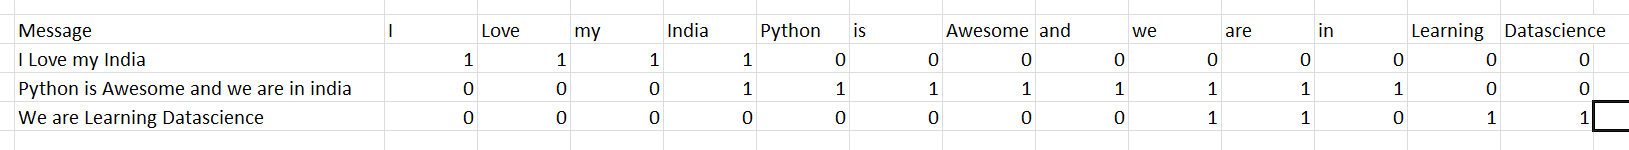

In [17]:
from sklearn.feature_extraction.text import \
CountVectorizer

In [18]:
cv = CountVectorizer()
message_array = \
cv.fit_transform(email['Message']).toarray()

In [20]:
pd.DataFrame(message_array)

,0,1,2,3,4,5,6,7,8,9,...,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
email['Category']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [23]:
email['Category'] = \
email.Category.apply(lambda x: 0 if x=='ham' else 1)

In [24]:
email['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [26]:
X = message_array
y = email.Category

In [28]:
email.sample()

,Category,Message
1116,0,So lets make it saturday or monday as per conv...


# Train Test

In [34]:
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.25,random_state=23)

In [35]:
model = MultinomialNB()

In [36]:
model.fit(X_train,y_train)

MultinomialNB()

In [40]:
model.score(X_test,y_test)

0.9856424982053122

In [41]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.pipeline import Pipeline


clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [55]:
X_train, X_test, y_train, y_test = \
train_test_split(email['Message'],
                 y,
                 test_size=0.2,random_state=42)

In [57]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [58]:
clf.score(X_test,y_test)

0.9919282511210762

In [77]:
email1 = email.loc[1196,'Message']
email1

'You have 1 new voicemail. Please call 08719181503'

In [82]:
email2 = email.loc[0,'Message']
email2

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [83]:
# Message

In [90]:
em = [email1,email2]

<!-- # em = [
#     'Hey mohan, can we get together to watch footbal game tomorrow?',
#     'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
# ] -->

In [86]:
clf.predict(em)

array([1, 0], dtype=int64)

In [92]:
msg = ['You Won 100Rs contact us 9898765432']
ans = clf.predict(msg)[0]

if ans == 1:
    print('Spam Email')
else:
    print('Non Spam email')

Spam Email


In [93]:
msg = ['Your Hotel has been booked for interview!!']
ans = clf.predict(msg)[0]

if ans == 1:
    print('Spam Email')
else:
    print('Non Spam email')

Non Spam email


# Conclusion
Naive Bayes is a simple and powerful algorithm for text classification tasks. It performs well in spam detection, where the features (words) are conditionally independent given the class label. However, the strong independence assumption may not hold in all cases, which can affect the model's performance.

In [94]:
# For Practice:- Try same with other ML Models